### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [5]:
pct_to_target[0:10]

array([[1.0609654 , 1.01297784, 0.85446317, ..., 0.83065074, 1.02403082,
        0.93223151],
       [0.95567079, 1.05769563, 0.93394677, ..., 0.95893174, 0.919784  ,
        0.82392565],
       [0.8522712 , 0.98010312, 1.0149648 , ..., 0.86685341, 0.9785056 ,
        1.10522303],
       ...,
       [0.87584094, 0.9947463 , 0.96506696, ..., 0.89364417, 0.92257627,
        1.01855429],
       [1.09790159, 1.1626934 , 0.96758128, ..., 1.10086434, 1.12223965,
        0.91511047],
       [0.91875572, 0.95647533, 1.1098112 , ..., 1.01749537, 0.86627784,
        1.02307431]])

In [6]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [7]:
sales_target[0:10]

array([[ 75000,  75000, 300000, ..., 200000,  75000, 100000],
       [200000,  75000, 200000, ..., 100000, 300000, 100000],
       [100000,  75000, 100000, ...,  75000, 200000, 100000],
       ...,
       [ 75000, 300000, 400000, ...,  75000,  75000,  75000],
       [200000,  75000, 300000, ..., 100000, 200000,  75000],
       [100000, 200000, 300000, ...,  75000, 100000, 100000]])

In [8]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [9]:
commission_percentages[0:10]

array([[0.04, 0.04, 0.02, ..., 0.02, 0.04, 0.03],
       [0.03, 0.04, 0.03, ..., 0.03, 0.03, 0.02],
       [0.02, 0.03, 0.04, ..., 0.02, 0.03, 0.04],
       ...,
       [0.02, 0.04, 0.03, ..., 0.02, 0.03, 0.04],
       [0.04, 0.04, 0.03, ..., 0.04, 0.04, 0.03],
       [0.03, 0.03, 0.04, ..., 0.04, 0.02, 0.04]])

In [10]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [11]:
total_commissions.std()

95858.44497957129

In [12]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2812500.0
1,2896000.0
2,2819250.0
3,2840500.0
4,2887000.0


<AxesSubplot:title={'center':'Commissions Distribution'}, ylabel='Frequency'>

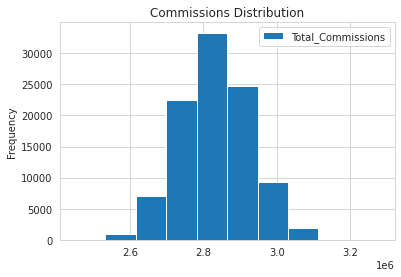

In [13]:
df.plot(kind='hist', title='Commissions Distribution')

In [14]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.831567e+06
std,9.585892e+04
min,2.449750e+06
25%,2.766250e+06
50%,2.830500e+06
75%,2.895750e+06
max,3.279750e+06


---
*EOF*